In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/Olive/update_olive_dataset3.xlsx')
data.head()


Age yr BP  Olive influx (grains cm-2 yr-1)  LOESS smooth.  2.5 percentile  \
0       2349                        39.000000      39.000000       11.577924   
1       2369                        37.869565      37.869565       22.224656   
2       2389                        36.739130      36.739130       23.310060   
3       2409                        35.608696      35.608696       21.430748   
4       2429                        34.478261      34.478261       20.252595   

   97.5 percentile   Annual_1      Sd_1   January  February-March   Spring_1  \
0        64.262421  15.083333  0.195789  6.300000        8.300000  13.633333   
1        52.608346  14.973188  0.209101  6.126087        8.152174  13.552174   
2        50.427797  14.863043  0.222414  5.952174        8.004348  13.471014   
3        50.483866  14.752899  0.235726  5.778261        7.856522  13.389855   
4        50.000837  14.642754  0.249039  5.604348        7.708696  13.308696   

    Summer_1  Tmin January  Tmax Summer    Annual_2    Spring_2   Summer_2  \
0  22.533333      3.000000    28.230000  552.700000  132.800000  45.500000   
1  22.457971      2.982609    28.219565  542.769565  128.591304  43.413043   
2  22.382609      2.965217    28.209130  532.839130  124.382609  41.326087   
3  22.307246      2.947826    28.198696  522.908696  120.173913  39.239130   
4  22.231884      2.930435    28.188261  512.978261  115.965217  37.152174   

   October-November  
0        109.600000  
1        107.547826  
2        105.495652  
3        103.443478  
4        101.391304

In [3]:
X = data.drop(['Olive influx (grains cm-2 yr-1)'], axis=1)
y = data['Olive influx (grains cm-2 yr-1)']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)



     Age yr BP  LOESS smooth.  2.5 percentile  97.5 percentile   Annual_1  \
0         2349      39.000000       11.577924        64.262421  15.083333   
1         2369      37.869565       22.224656        52.608346  14.973188   
2         2389      36.739130       23.310060        50.427797  14.863043   
3         2409      35.608696       21.430748        50.483866  14.752899   
4         2429      34.478261       20.252595        50.000837  14.642754   
..         ...            ...             ...              ...        ...   
264       7629     138.272727      108.627372       150.094978  18.005208   
265       7649     109.300000       66.927332       109.871278  18.197917   
266       7669     127.836526      109.217057       162.585688  18.175000   
267       7689     129.612308      122.884616       161.944262  18.008333   
268       7709     128.880353      113.196615       173.946806  18.081566   

         Sd_1   January  February-March   Spring_1   Summer_1  Tmin January

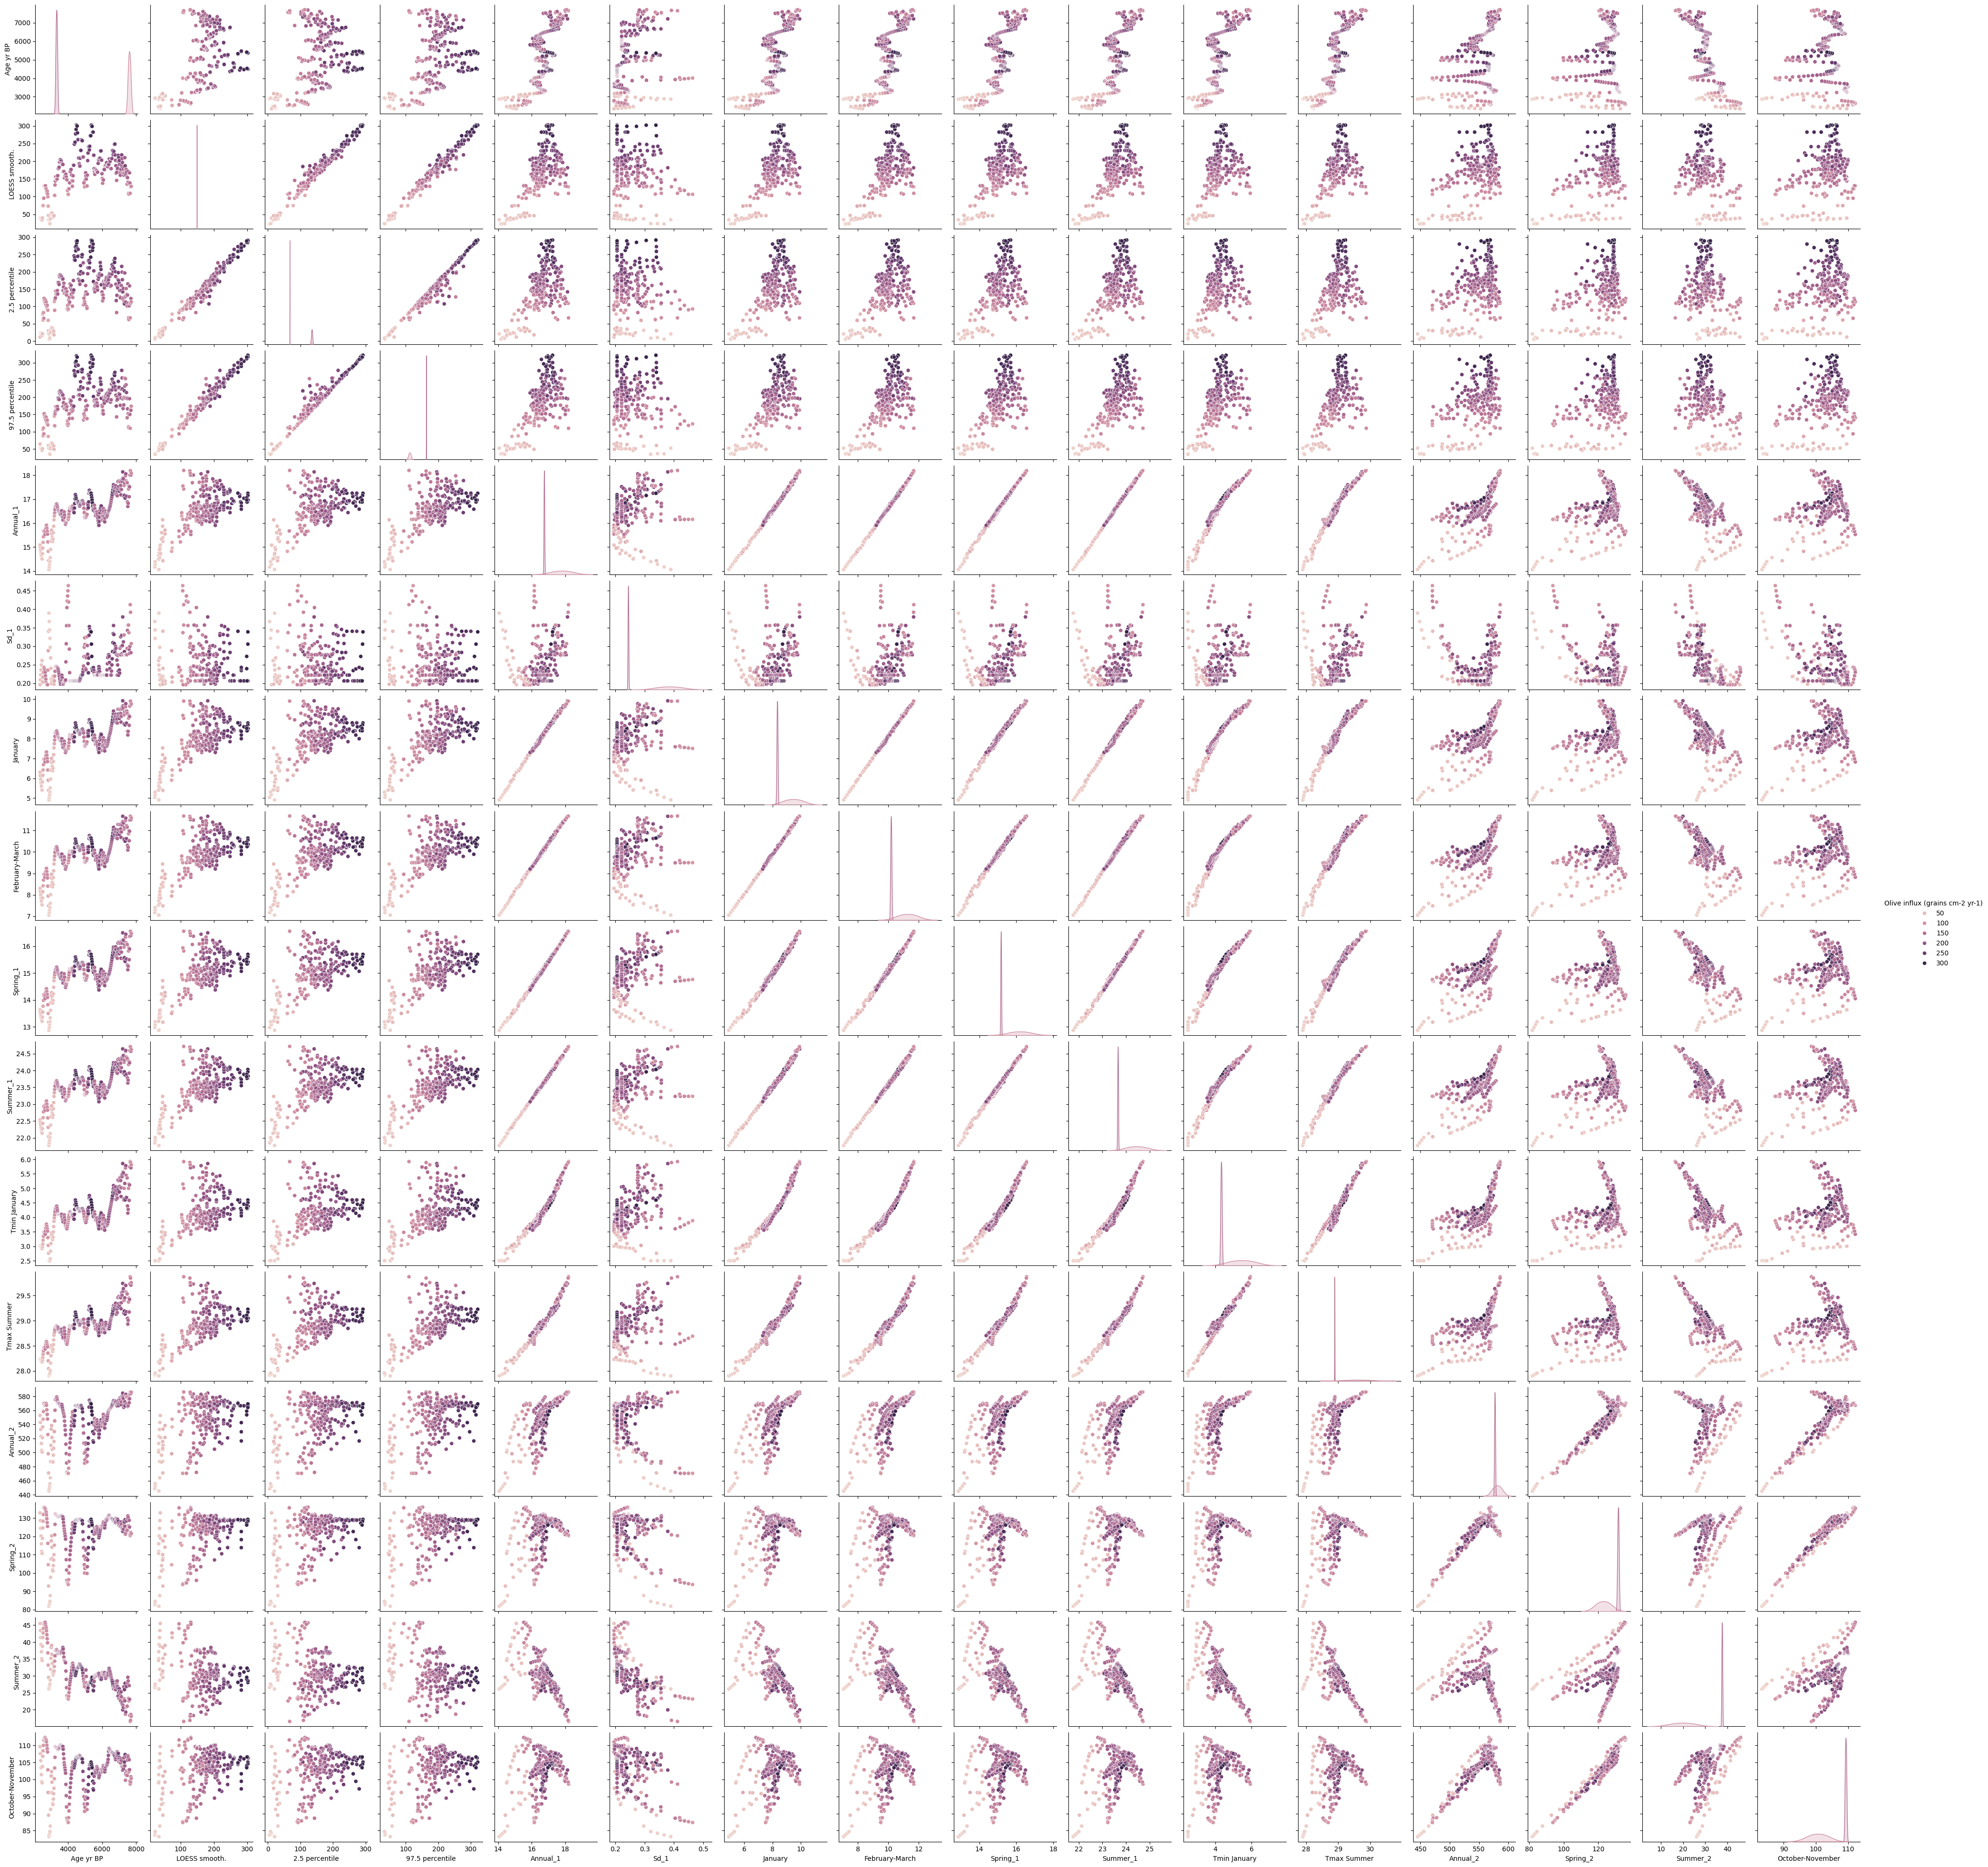

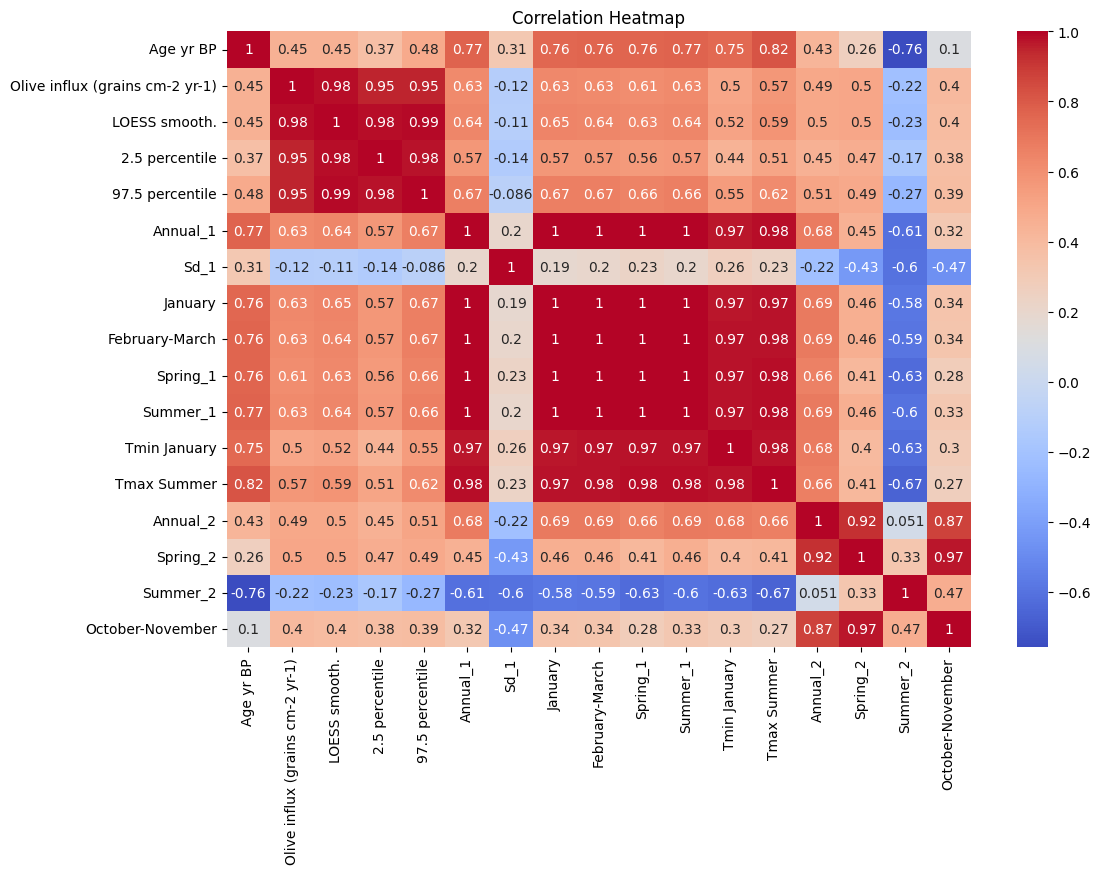

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family to a font available on your system
plt.rcParams['font.family'] = 'sans-serif'

# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Olive influx (grains cm-2 yr-1)')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [6]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


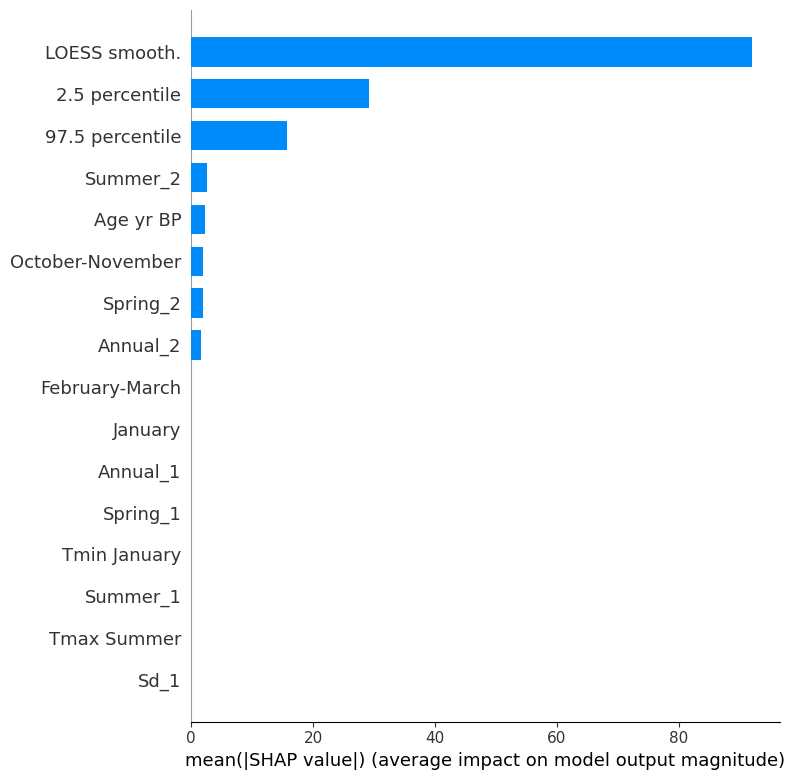

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge, HuberRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have mounted your drive and loaded your data as X and y

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a HuberRegressor model
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)

# Train a BayesianRidge model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Ensemble predictions
y_pred_ensemble = (huber_reg.predict(X_val) + bayesian_ridge.predict(X_val)) / 2

# Use SHAP to explain the model's predictions
explainer = shap.Explainer(huber_reg, X_train)  # Explainer for HuberRegressor model
shap_values_huber = explainer.shap_values(X_val)

explainer = shap.Explainer(bayesian_ridge, X_train)  # Explainer for BayesianRidge model
shap_values_bayesian = explainer.shap_values(X_val)

# Ensemble SHAP values
shap_values_ensemble = (shap_values_huber + shap_values_bayesian) / 2

# Visualize the SHAP values using a beeswarm plot for the ensemble model
shap.summary_plot(shap_values_ensemble, X_val, plot_type="bar")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


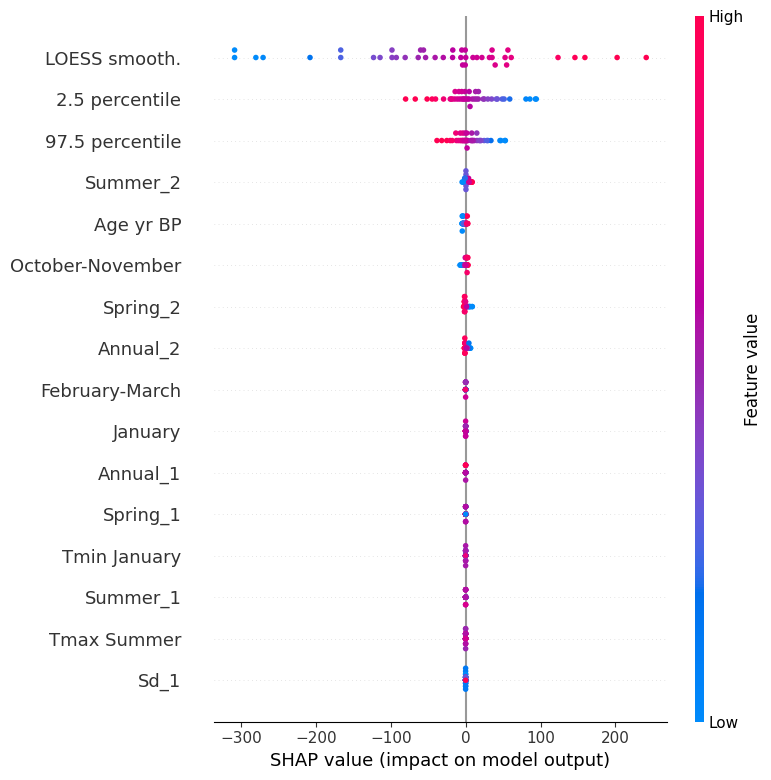

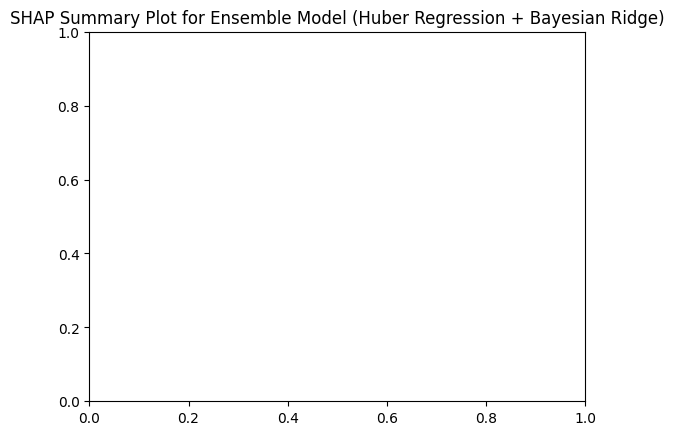

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge, HuberRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have mounted your drive and loaded your data as X and y

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a HuberRegressor model
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)

# Train a BayesianRidge model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Ensemble predictions
y_pred_ensemble = (huber_reg.predict(X_val) + bayesian_ridge.predict(X_val)) / 2

# Use SHAP to explain the model's predictions
explainer_huber = shap.Explainer(huber_reg, X_train)  # Explainer for HuberRegressor model
shap_values_huber = explainer_huber.shap_values(X_val)

explainer_bayesian = shap.Explainer(bayesian_ridge, X_train)  # Explainer for BayesianRidge model
shap_values_bayesian = explainer_bayesian.shap_values(X_val)

# Ensemble SHAP values
shap_values_ensemble = (shap_values_huber + shap_values_bayesian) / 2

# Visualize the SHAP values using a beeswarm plot for the ensemble model
shap.summary_plot(shap_values_ensemble, X_val)
plt.title("SHAP Summary Plot for Ensemble Model (Huber Regression + Bayesian Ridge)")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


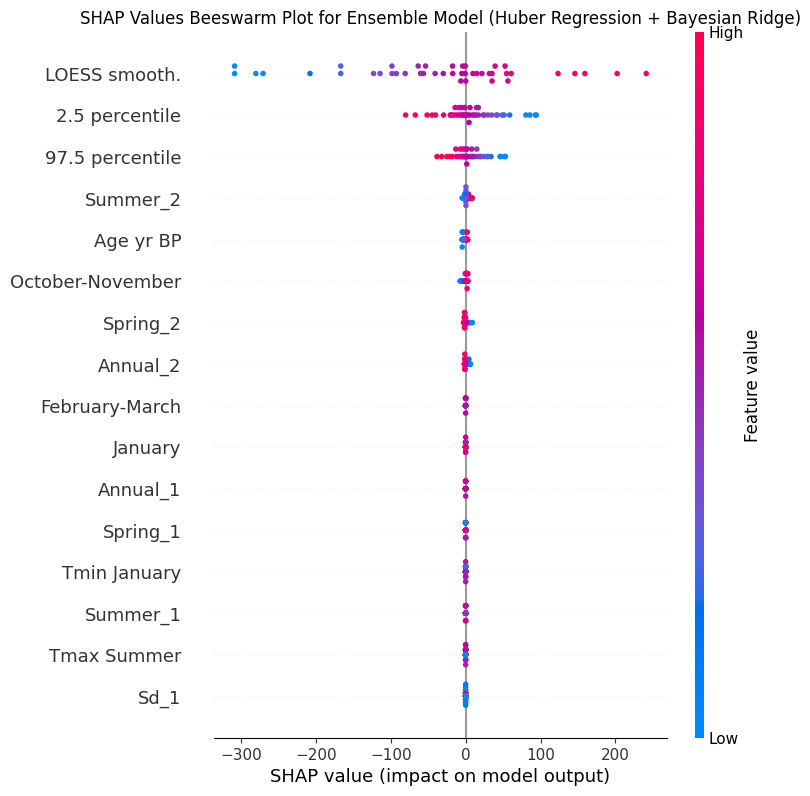

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge, HuberRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have mounted your drive and loaded your data as X and y

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a HuberRegressor model
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)

# Train a BayesianRidge model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Ensemble predictions
y_pred_ensemble = (huber_reg.predict(X_val) + bayesian_ridge.predict(X_val)) / 2

# Use SHAP to explain the model's predictions
explainer_huber = shap.Explainer(huber_reg, X_train)  # Explainer for HuberRegressor model
shap_values_huber = explainer_huber.shap_values(X_val)

explainer_bayesian = shap.Explainer(bayesian_ridge, X_train)  # Explainer for BayesianRidge model
shap_values_bayesian = explainer_bayesian.shap_values(X_val)

# Ensemble SHAP values
shap_values_ensemble = (shap_values_huber + shap_values_bayesian) / 2

# Visualize the SHAP values for the ensemble model using a beeswarm plot
shap.summary_plot(shap_values_ensemble, X_val, plot_type="dot", show=False)
plt.title("SHAP Values Beeswarm Plot for Ensemble Model (Huber Regression + Bayesian Ridge)")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


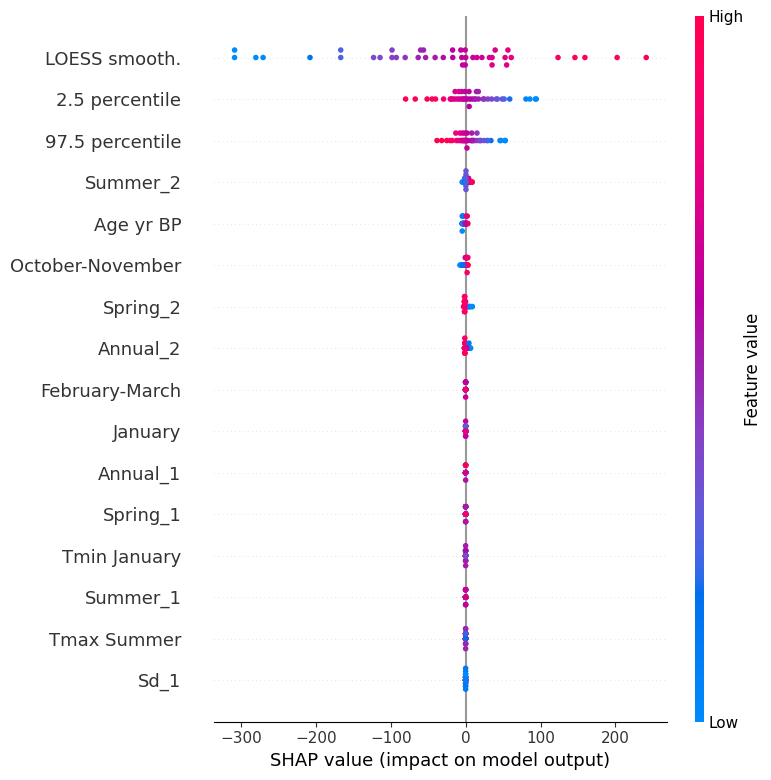

In [10]:
import shap
from sklearn.linear_model import BayesianRidge, HuberRegressor
from sklearn.model_selection import train_test_split

# Assuming you have mounted your drive and loaded your data as X and y

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a HuberRegressor model
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)

# Train a BayesianRidge model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Create a wrapper function that takes an input and returns ensemble model predictions
def predict_wrapper(X):
    return (huber_reg.predict(X) + bayesian_ridge.predict(X)) / 2

# Use the wrapper function with SHAP Explainer
explainer = shap.Explainer(predict_wrapper, X_train)  # Assuming X_train is your background dataset
shap_values = explainer(X_val)

# Now you can proceed with your analysis, for example, by visualizing the SHAP values
shap.summary_plot(shap_values, X_val)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


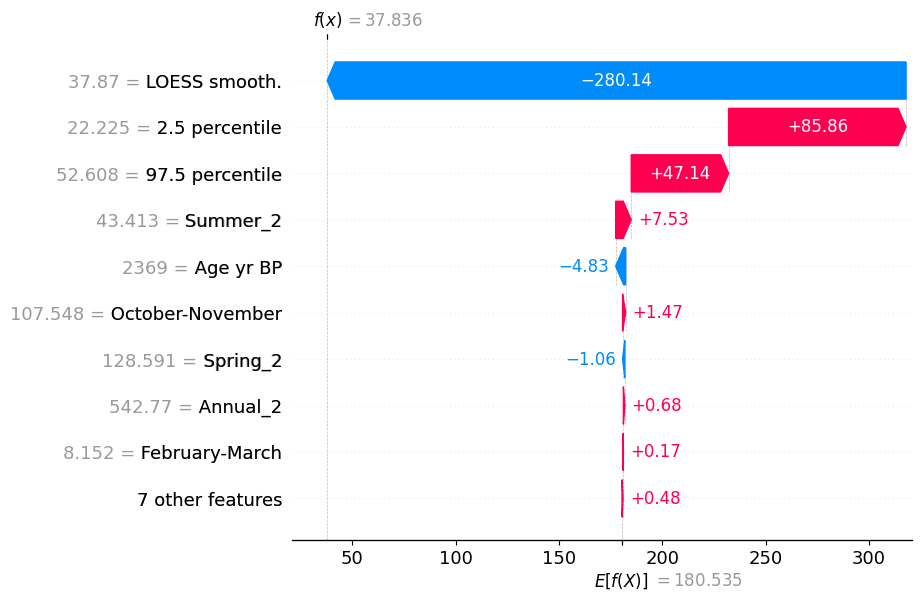

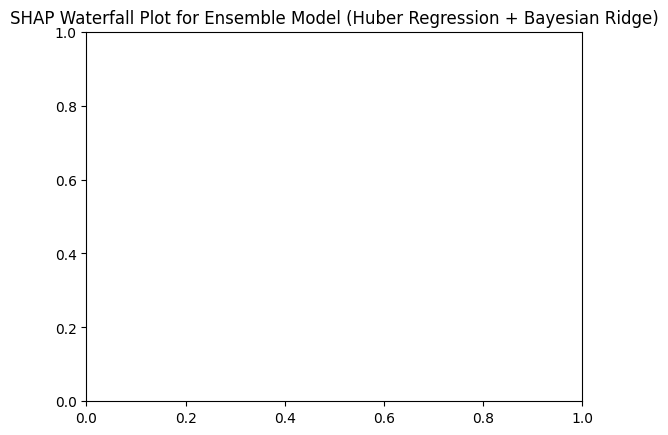

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge, HuberRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have mounted your drive and loaded your data as X and y

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a HuberRegressor model
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)

# Train a BayesianRidge model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Ensemble predictions
y_pred_ensemble = (huber_reg.predict(X_val) + bayesian_ridge.predict(X_val)) / 2

# Use SHAP to explain the model's predictions
explainer_huber = shap.Explainer(huber_reg, X_train)  # Explainer for HuberRegressor model
shap_values_huber = explainer_huber.shap_values(X_val)

explainer_bayesian = shap.Explainer(bayesian_ridge, X_train)  # Explainer for BayesianRidge model
shap_values_bayesian = explainer_bayesian.shap_values(X_val)

# Ensemble SHAP values
shap_values_ensemble = (shap_values_huber + shap_values_bayesian) / 2

# Visualize the SHAP waterfall plot for the ensemble model
shap.waterfall_plot(shap.Explanation(values=shap_values_ensemble[0], base_values=explainer_huber.expected_value, data=X_val.iloc[0], feature_names=X_val.columns))
plt.title("SHAP Waterfall Plot for Ensemble Model (Huber Regression + Bayesian Ridge)")
plt.show()


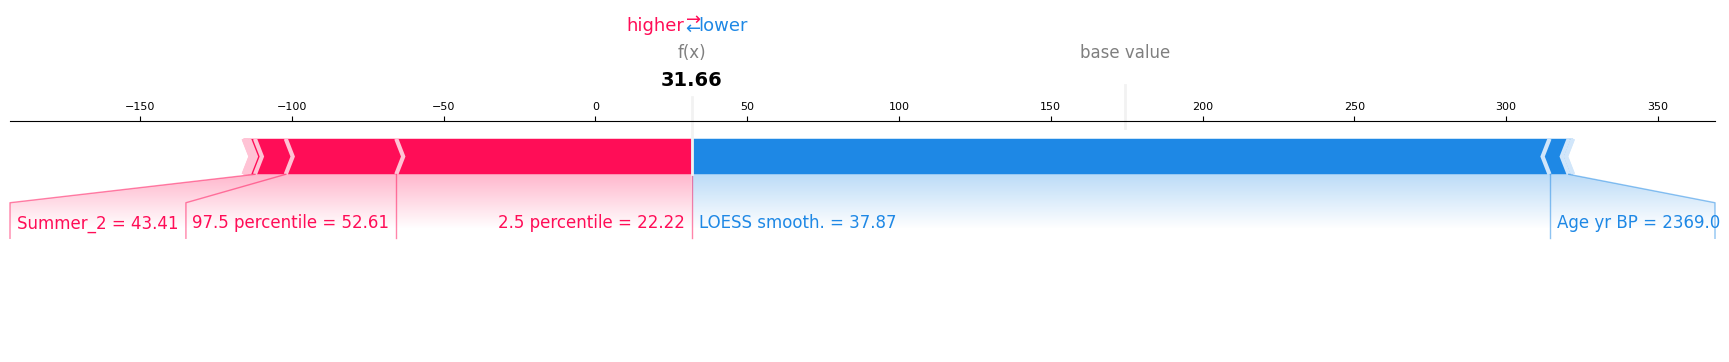

In [56]:
# Assuming the necessary imports have already been done
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import BayesianRidge, HuberRegressor

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a HuberRegressor model
huber_reg = HuberRegressor(max_iter=1000)
huber_reg.fit(X_train, y_train)

# Train a BayesianRidge model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Ensemble predictions
y_pred_ensemble = (huber_reg.predict(X_val) + bayesian_ridge.predict(X_val)) / 2

# Use SHAP to explain the model's predictions
explainer_huber = shap.Explainer(huber_reg, X_train)  # Explainer for HuberRegressor model
shap_values_huber = explainer_huber.shap_values(X_val)

explainer_bayesian = shap.Explainer(bayesian_ridge, X_train)  # Explainer for BayesianRidge model
shap_values_bayesian = explainer_bayesian.shap_values(X_val)
# Ensemble SHAP values
shap_values_ensemble = (shap_values_huber + shap_values_bayesian) / 2
# Visualize a force plot for a single sample from the validation set
sample_index = 0  # Choose a sample index from the validation set
mean_value = np.mean(huber_reg.predict(X_train), axis=0)
rounded_data_instance = np.round(X_val.iloc[sample_index], 2)

rounded_shap_values = np.round(shap_values_ensemble[sample_index], 2)



shap_force =shap.force_plot(
    shap.Explanation(values=rounded_shap_values,
                     base_values=mean_value,
                     data=rounded_data_instance),
    matplotlib=True,
    show=False

)

shap_force.set_size_inches(22, 3)
shap_force


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<Figure size 2000x500 with 0 Axes>

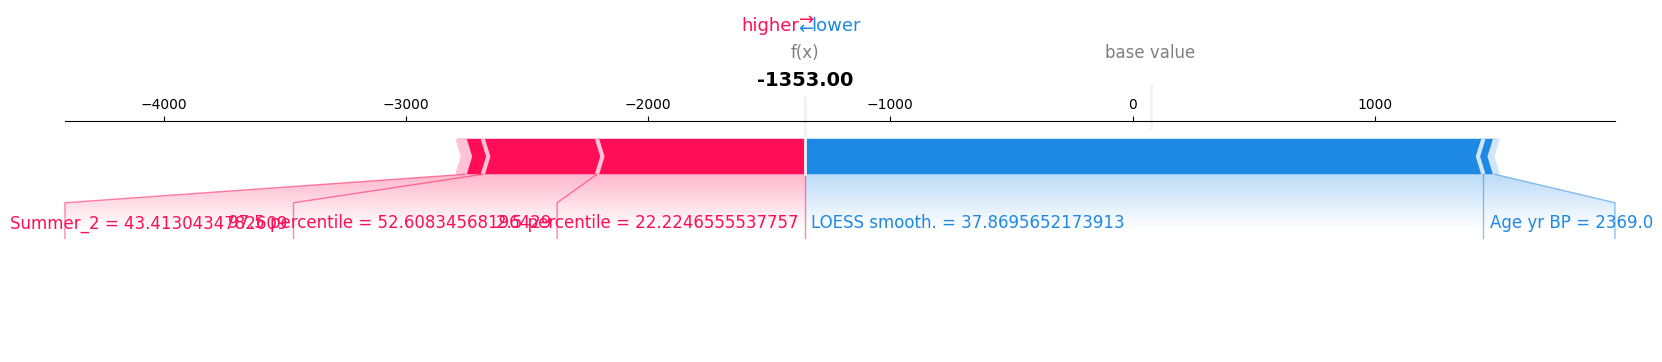

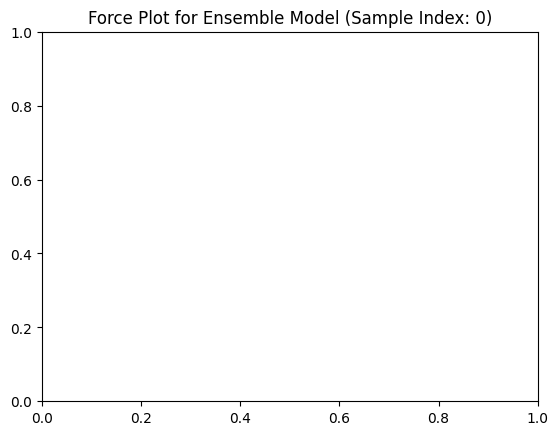

In [13]:
# Assuming the necessary imports have already been done
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import BayesianRidge, HuberRegressor

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a HuberRegressor model
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)

# Train a BayesianRidge model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Ensemble predictions
y_pred_ensemble = (huber_reg.predict(X_val) + bayesian_ridge.predict(X_val)) / 2

# Use SHAP to explain the model's predictions
explainer_huber = shap.Explainer(huber_reg, X_train)  # Explainer for HuberRegressor model
shap_values_huber = explainer_huber.shap_values(X_val)

explainer_bayesian = shap.Explainer(bayesian_ridge, X_train)  # Explainer for BayesianRidge model
shap_values_bayesian = explainer_bayesian.shap_values(X_val)

# Ensemble SHAP values
shap_values_ensemble = (shap_values_huber + shap_values_bayesian) / 2



# Visualize a force plot for a single sample from the validation set
sample_index = 0  # Choose a sample index from the validation set

# Increase figure size for better readability
plt.figure(figsize=(20, 5))

# Adjust SHAP values for better spacing
shap_values_scaled = shap_values_ensemble[sample_index] * 10  # You can adjust the scaling factor as needed

# Set a custom base value to separate positive and negative contributions
custom_base_value = np.mean(huber_reg.predict(X_train), axis=0) - 100

# Round the red SHAP values to 22.303 digits
shap_values_rounded = np.round(shap_values_scaled, 22)

shap.force_plot(
    shap.Explanation(values=shap_values_rounded,
                     base_values=custom_base_value,
                     data=X_val.iloc[sample_index]),
    matplotlib=True
)
plt.title("Force Plot for Ensemble Model (Sample Index: {})".format(sample_index))
plt.show()



In [57]:
import shap

# Initialize JavaScript visualization libraries
shap.initjs()

# Use SHAP to explain the model's predictions for HuberRegressor
explainer_huber = shap.Explainer(huber_reg, X_train)
shap_values_huber = explainer_huber.shap_values(X_val)

# Use SHAP to explain the model's predictions for BayesianRidge
explainer_bayesian = shap.Explainer(bayesian_ridge, X_train)
shap_values_bayesian = explainer_bayesian.shap_values(X_val)

# Ensemble SHAP values
shap_values_ensemble = (shap_values_huber + shap_values_bayesian) / 2

# Visualize the stacked force plot for the ensemble model
shap.force_plot(explainer_huber.expected_value, shap_values_ensemble, X_val)
